In [4]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import shutil
from pathlib import Path
import yaml

# ============= DIRECTORY SETUP of this NOTEBOOK ===============
notebook_dir = Path(os.getcwd())
print(f"Current notebook Dir: {os.getcwd()}")

def find_project_root(indicators=("LICENSE.txt", ".github", "environment.yml")):
    current = os.path.abspath(os.getcwd())  # start from current dir

    while True:
        if all(os.path.exists(os.path.join(current, ind)) for ind in indicators):
            return current
        parent = os.path.dirname(current)
        if parent == current:  # reached filesystem root
            raise FileNotFoundError(f"Could not find project root with indicators: {indicators}")
        current = parent

project_root = find_project_root()
print(f"project root Dir: {project_root}")



Current notebook Dir: /Users/huytran/Desktop/freiburg/SS25/NR-4_explaining_blood_cells/notebooks
project root Dir: /Users/huytran/Desktop/freiburg/SS25/NR-4_explaining_blood_cells


In [8]:
# read config from configs/
with open(os.path.join(project_root,'configs/wbcatt_default_huy.yml'), 'r') as file:
    config = yaml.safe_load(file)


print(config.keys())
print(config['data'])
wbcatt_working_dir = os.path.join(project_root, config['data']['wbcatt_working_dir'])
wbcatt_images_dir = os.path.join(project_root, config['data']['wbcatt_images_dir'])

# Get the cell type folders
cell_type_dirs = [d for d in os.listdir(wbcatt_images_dir) if os.path.isdir(os.path.join(wbcatt_images_dir, d))]
print(f"Found {len(cell_type_dirs)} cell types: {cell_type_dirs}")
# Found 8 cell types: ['basophil', 'neutrophil', 'ig', 'monocyte', 'eosinophil', 'erythroblast', 'lymphocyte', 'platelet']

# Info on white blood cells folders
wbc_names = ['basophil', 'neutrophil', 'monocyte', 'eosinophil', 'lymphocyte']
other_names = ['ig', 'erythroblast', 'platelet']
# count images in each cell type folder
image_counts = {}
for cell_type in cell_type_dirs:
    image_path = os.path.join(wbcatt_images_dir, cell_type, '*.jpg')
    image_files = glob.glob(image_path)
    image_counts[cell_type] = len(image_files)

print("Image counts per cell type:")
for cell_type, count in image_counts.items():
    if (cell_type in wbc_names):
        print(f"\t{cell_type}: {count} images")
    else:
        print(f"\t{cell_type}: {count} images (Other category)")

print(f"\tWhite blood cell ---- {sum(image_counts[cell_type] for cell_type in wbc_names)} images")





dict_keys(['config_name', 'experiment_name', 'data'])
{'dataset_name': 'wbcatt', 'wbcatt_working_dir': 'wbcatt/', 'wbcatt_images_dir': 'wbcatt/submission/data/PBC/PBC_dataset_normal_DIB', 'image_filename_extension': 'jpg'}
Found 8 cell types: ['basophil', 'neutrophil', 'ig', 'monocyte', 'eosinophil', 'erythroblast', 'lymphocyte', 'platelet']
Image counts per cell type:
	basophil: 1218 images
	neutrophil: 3329 images
	ig: 2895 images (Other category)
	monocyte: 1420 images
	eosinophil: 3117 images
	erythroblast: 1551 images (Other category)
	lymphocyte: 1214 images
	platelet: 2348 images (Other category)
	White blood cell ---- 10298 images


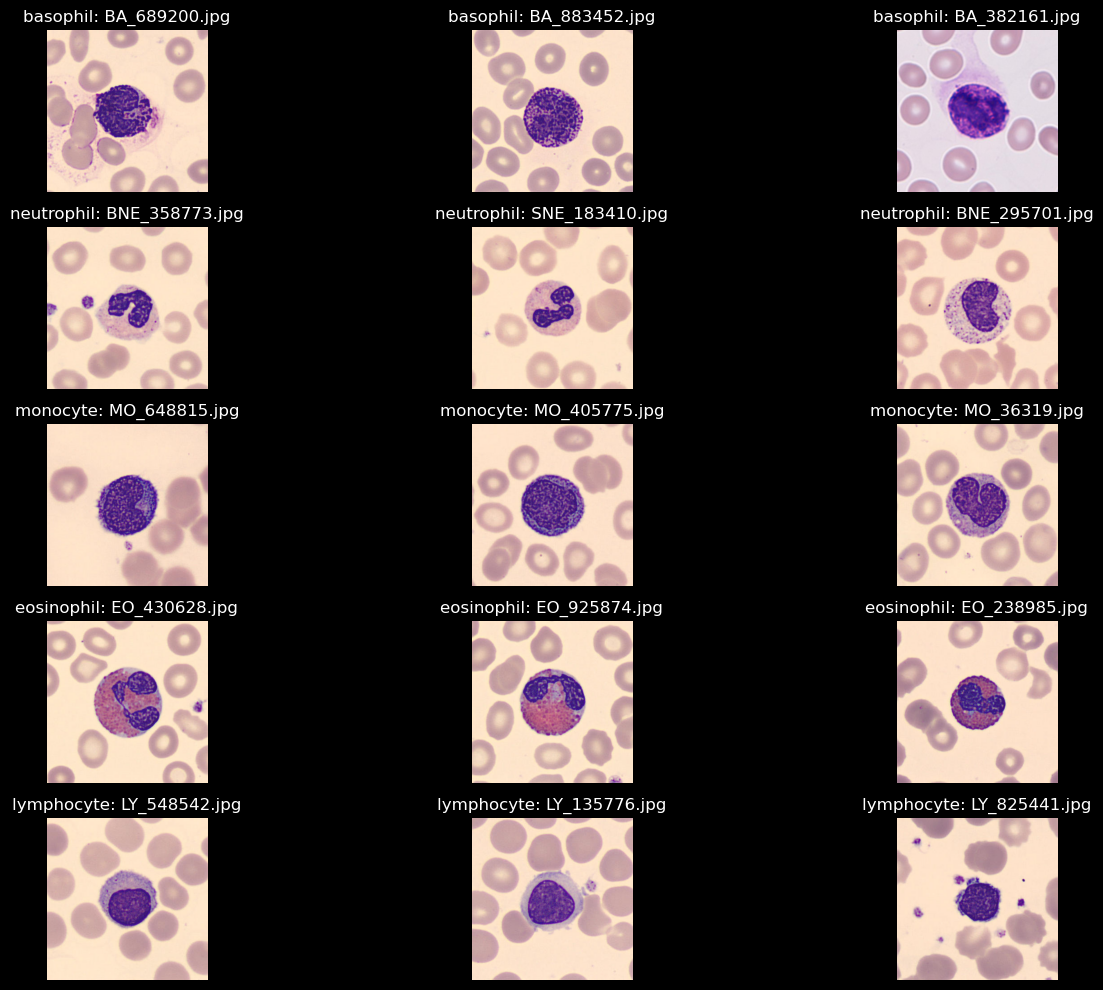

In [9]:
# Display a few sample images
plt.style.use('dark_background')
plt.figure(figsize=(15, 10))
# Show 5 cell types, 3 images each:
for idx, cell_type in enumerate(wbc_names):
    cell_dir = os.path.join(wbcatt_images_dir, cell_type)
    image_paths = glob.glob(os.path.join(cell_dir, f"*.{config['data']['image_filename_extension']}"))
    try:
        img = Image.open(image_paths[0])
    except Exception as e:
        print(f"Failed to open image: {img_path} with error: {e}")
        continue

    # Display 3 images per cell type
    for i in range(3):
        img_path = image_paths[i]
        img = Image.open(img_path)
        plt.subplot(5, 3, idx*3 + i + 1)
        plt.imshow(np.array(img))
        plt.title(f"{cell_type}: {os.path.basename(img_path)}")
        plt.axis('off')
plt.tight_layout()
plt.show()


## TODO: Add WBC labels (annotations) to dataset for StyleGAN  

In [ ]:
# SEE wbcatt_dataset_tool.py
# EXAMPLE run
"
'''
Create 256x256 dataset with 500 images from each cell type (WB cells only)
python wbcatt_dataset_tool.py --source wbcatt/submission/data/PBC/PBC_dataset_normal_DIB \
 --output wbcatt/wbc-256x256_m500.zip --resolution 256x256 --images-per-cell 500
'''

Preparing dataset with cell type labels...
Processing basophil (class 0)...
Processing neutrophil (class 1)...
Processing monocyte (class 2)...
Processing eosinophil (class 3)...
Processing lymphocyte (class 4)...
Copied 10298 images to /Users/huytran/Desktop/freiburg/SS25/NR-4_explaining_blood_cells/wbcatt/wbc_temp
Cell type mapping: {'basophil': 0, 'neutrophil': 1, 'monocyte': 2, 'eosinophil': 3, 'lymphocyte': 4}
